## 4.1 Transmitting Digital signals

### 4.1.1 Transmitting Digital Signals: Baseband Transmission


1.0277292310244588


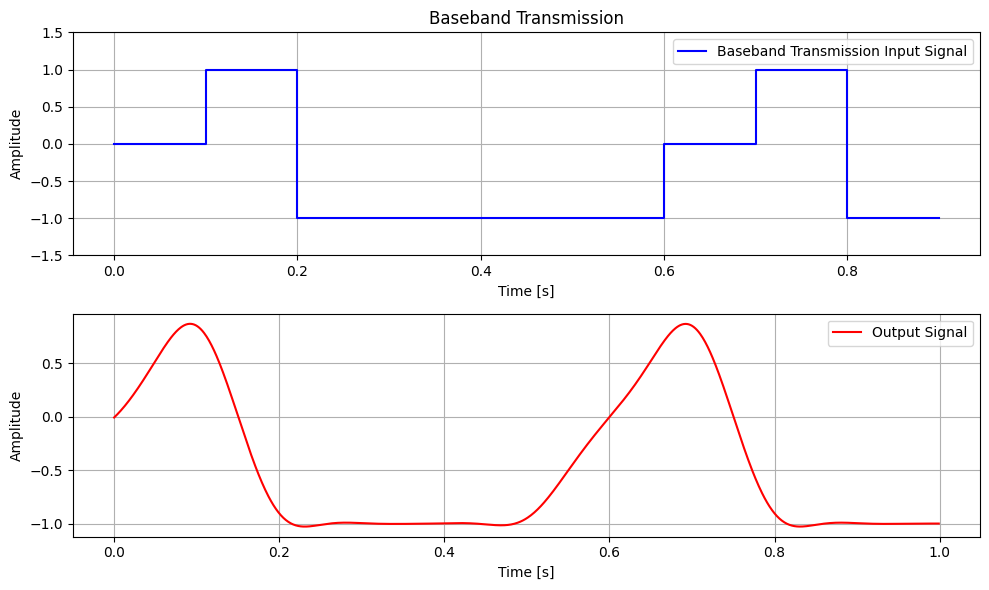

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

t = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

input_signal = np.array([0, 1, -1, -1, -1, -1, 0, 1, -1, -1])

# Plot the hardcoded input signal
plt.figure(figsize=(10, 6))

# Input signal plot
plt.subplot(2, 1, 1)
plt.step(t, input_signal, where='post', label='Baseband Transmission Input Signal', color='b')
plt.title('Baseband Transmission')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.ylim(-1.5, 1.5)
plt.legend()

fs = 1000
f2 = 10
nyq = 0.5 * fs
low = f2 / nyq
b, a = signal.butter(4, low, btype='low')

t_interpolated = np.linspace(0, 1, fs, endpoint=False)
input_signal_interpolated = np.interp(t_interpolated, t, input_signal)

output_signal = signal.filtfilt(b, a, input_signal_interpolated)

plt.subplot(2, 1, 2)
plt.plot(t_interpolated, output_signal, label='Output Signal', color='r')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

3.2.1

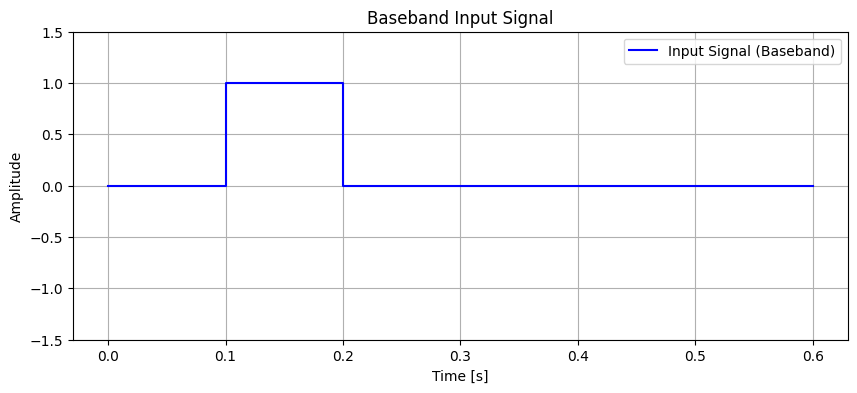

In [6]:
import numpy as np
import matplotlib.pyplot as plt

t = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

input_signal = np.array([0, 1, 0, 0, 0, 0, 0])
carrier_freq = 10
carrier_signal = np.sin(2 * np.pi * carrier_freq * t)
modulated_signal = input_signal * carrier_signal

plt.figure(figsize=(10, 4))
plt.step(t, input_signal, where='post', label='Input Signal (Baseband)', color='b')
plt.title('Baseband Input Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

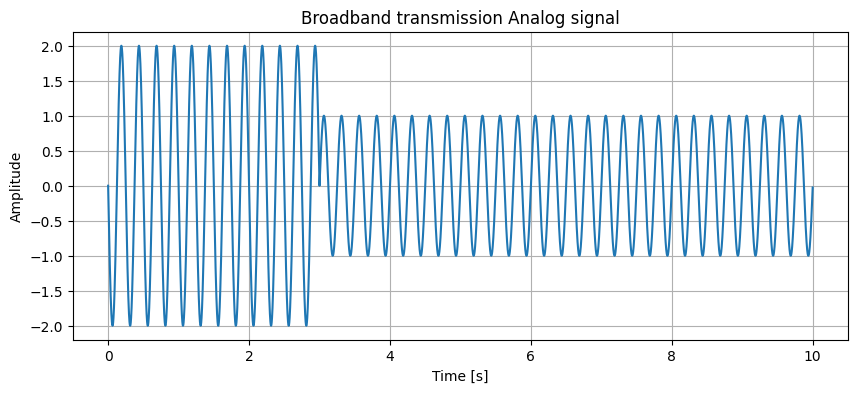

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
wavelength = 1  # Desired wavelength in meters
wave_speed = 4  # Speed of wave (in the same units as wavelength), e.g., meters/second
sampling_rate = 1000  # Sampling rate in Hz
duration = 10    # Duration of the signal in seconds

# Define timeframes and peak amplitudes
positive_peak_timeframe = (0, 3)  # Timeframe for positive peak (start, end) in seconds
negative_peak_timeframe = (0, 3)  # Timeframe for negative peak (start, end) in seconds
positive_peak_amplitude = 2  # Positive peak amplitude
negative_peak_amplitude = -2  # Negative peak amplitude

# Calculate the frequency from the wavelength
frequency = wave_speed / wavelength

# Generate the time values
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the base signal (sine wave)
signal = np.sin(2 * np.pi * frequency * t)

# Modify the signal within the positive peak timeframe
in_positive_peak_range = (t >= positive_peak_timeframe[0]) & (t <= positive_peak_timeframe[1])
signal[in_positive_peak_range] = positive_peak_amplitude * np.sin(2 * np.pi * frequency * t[in_positive_peak_range])

# Modify the signal within the negative peak timeframe
in_negative_peak_range = (t >= negative_peak_timeframe[0]) & (t <= negative_peak_timeframe[1])
signal[in_negative_peak_range] = negative_peak_amplitude * np.sin(2 * np.pi * frequency * t[in_negative_peak_range])

# Plot the analog signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title(f'Broadband transmission Analog signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


4.1

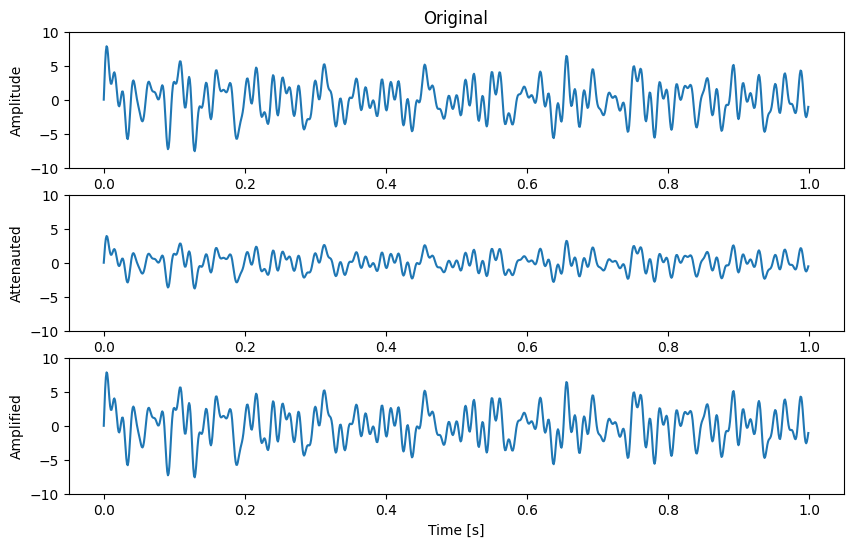

In [8]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000
t = np.arange(0, 1, 1/fs)

frequencies = np.random.uniform(1, 100, 10)
amplitudes = np.random.uniform(0.5, 1.5, 10)
waveform = np.sum([a * np.sin(2 * np.pi * f * t) for f, a in zip(frequencies, amplitudes)], axis=0)
waveform_attenuated = 0.5 * waveform
waveform_amplified = 2 * waveform_attenuated

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, waveform)
plt.title('Original')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.ylim(-10, 10)

plt.subplot(3, 1, 2)
plt.plot(t, waveform_attenuated)
plt.xlabel('Time [s]')
plt.ylabel('Attenauted')
plt.ylim(-10, 10)

plt.subplot(3, 1, 3)
plt.plot(t, waveform_amplified)
plt.xlabel('Time [s]')
plt.ylabel('Amplified')
plt.ylim(-10, 10)
plt.show()

4.2

In [3]:
import math

def desiBels(p1, p2):
    return 10 * math.log(p2/p1, 10)

print(desiBels(1, 0.5))

-3.0102999566398116


4.3

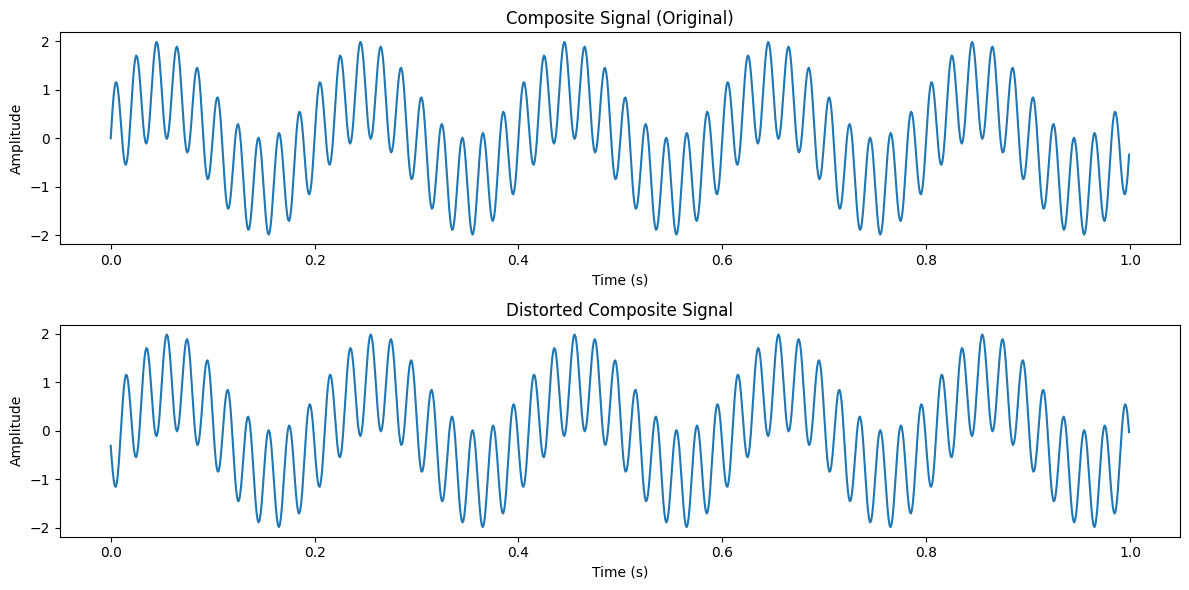

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000
t = np.arange(0, 1, 1/fs)

freq1 = 5
freq2 = 50
signal = np.sin(2 * np.pi * freq1 * t) + np.sin(2 * np.pi * freq2 * t)

delay1 = 0.01
delay2 = 0.03

distorted_signal_time_shift = np.sin(2 * np.pi * freq1 * (t - delay1)) + np.sin(2 * np.pi * freq2 * (t - delay2))

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Composite Signal (Original)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(t, distorted_signal_time_shift)
plt.title("Distorted Composite Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


4.4 Noise

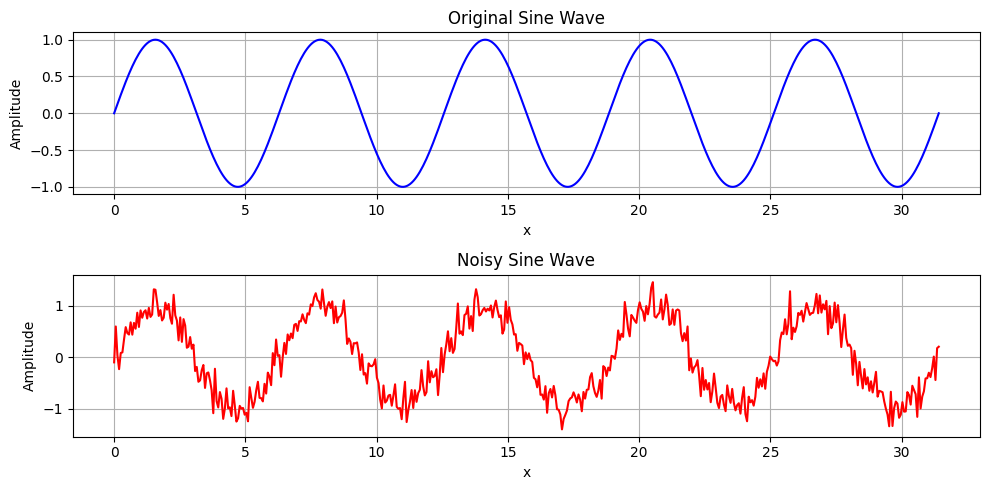

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10 * np.pi, 500)
clean_wave = np.sin(x)

noise = np.random.normal(0, 0.2, clean_wave.shape)
noisy_wave = clean_wave + noise

plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(x, clean_wave, label="Original Wave", color="blue")
plt.title("Original Sine Wave")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(x, noisy_wave, label="Noisy Wave", color="red")
plt.title("Noisy Sine Wave")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


4.6 SNR

In [7]:
import math

def SNRdB(aSignal, aNoise):
    snr = aSignal / aNoise
    snrDB = 10 * math.log(snr, 10)
    print(snrDB)
SNRdB(10000, 1)

40.0
